# Clustering

In [350]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [351]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import preprocessing


## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [352]:
#########################begin code for Task 1-a - 10 Points
#Loading the dataset
df = pd.read_csv('DataSet_2.csv')
print(df.shape)
df.head()


(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [354]:
#Dropping unnecessary column
df=df.drop("CUST_ID",axis=1)

#Replacing the missing values with mean 
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(),inplace=True)

#Replacing the missing values with median
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median(),inplace=True)
#Kmeans
#We select k =2 because, after 2 we can see that the grapgh is linearly decreasing
wcss = [] 
for i in range(1, 11): 
  k = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  k.fit(df) 
  wcss.append(k.inertia_)

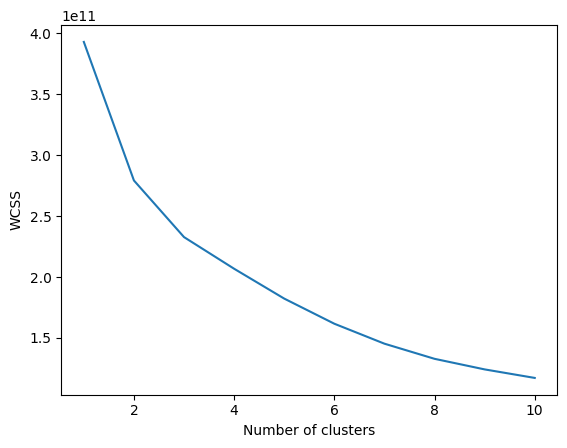

In [355]:
#Plotting
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

--> Performing k-means clustering for k=3,4,5 and visualize the predicted training samples and actual training sampless on scatter plots. 

--> Use 75% of the dataset for training and 25% of the dataset for testing. Perform k for clustering samples in your training set. 

--> Visualize predicted training samples and actual training samples on two scatter plots.Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA.You can easily apply PCA to your data with the help of scikit-learn.



# Task 1-b: Visualization for K-Means Clustering

--> Performing k-means clustering for k=3,4,5 and visualize the predicted training samples and actual training samples on scatter plots. 

--> Use 75% of the dataset for training and 25% of the dataset for testing. Perform k for clustering samples in your training set. 

--> Visualize predicted training samples and actual training samples on two scatter plots.Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA.You can easily apply PCA to your data with the help of scikit-learn.

In [356]:
###################begin code for Task 1-b-1: Split the datasetand set the random_state as 2021 without fail - 5 points

### Important!!!
X = df.drop('TENURE', axis=1)
Y = df['TENURE']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=2021)
print(X_test.shape) #printing the X_test.shape to get the shape of X
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)
###################end code for Task 1-b-1

(2238, 16)
(6712, 16)
(6712,)
(2238,)


In [357]:
#encoding the variables to similar datatype
#It has been performed above

Plot for predicted label training  


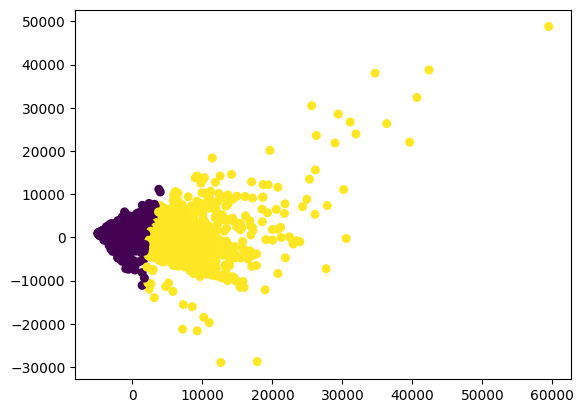

Plot for actual label training  


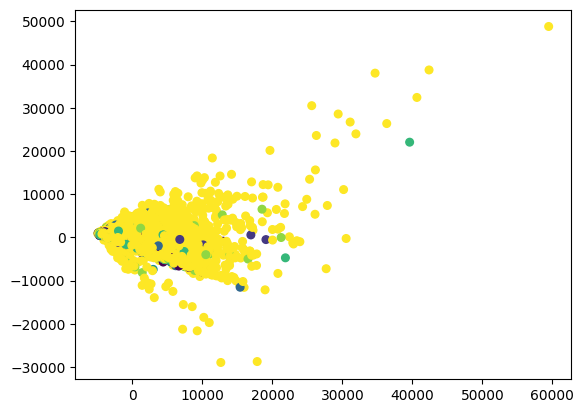

In [358]:

####Task 1-b-2: Visualize the predicted training labels vs actual training labels - 10 points
# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
k = KMeans(n_clusters = 2, random_state = 2021)
y_prediction = k.fit_predict(X_train)

# Compute cluster centers and predict cluster index for each sample 
centers = k.cluster_centers_

# Model and fit the data to the PCA model
pca=PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

print("Plot for predicted label training ")
plt.scatter(x,y,c=y_prediction,s=30,cmap='viridis')
plt.show()
print("Plot for actual label training  ")
plt.scatter(x,y,c=Y_train,s=30,cmap='viridis')
plt.show()

## Visualize using K=3,4,5 as well




#####end Task 1-b-2


Plot for predicted label training  


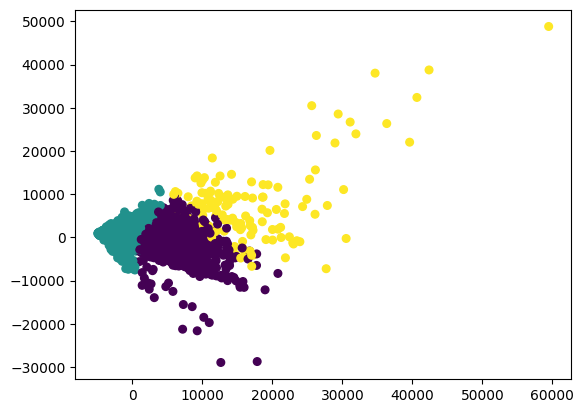

Plot for actual label training  


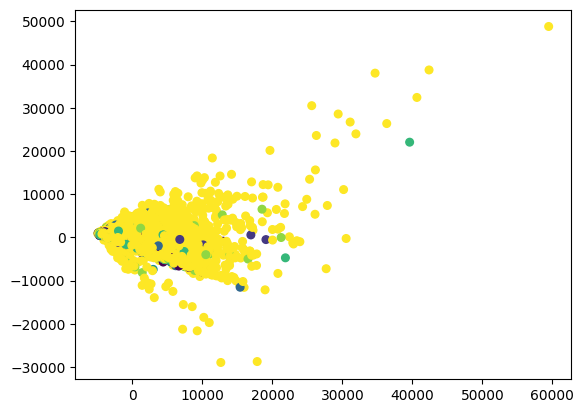

In [359]:
#Visualizing the kmeans with k=3
k3 = KMeans(n_clusters = 3, random_state = 2021)
y_prediction3 = k3.fit_predict(X_train)
centers3 = k3.cluster_centers_
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

print("Plot for predicted label training  ")
plt.scatter(x,y,c=y_prediction3,s=30,cmap='viridis')
plt.show()
print("Plot for actual label training  ")
plt.scatter(x,y,c=Y_train,s=30,cmap='viridis')
plt.show()

Plot for predicted label training  


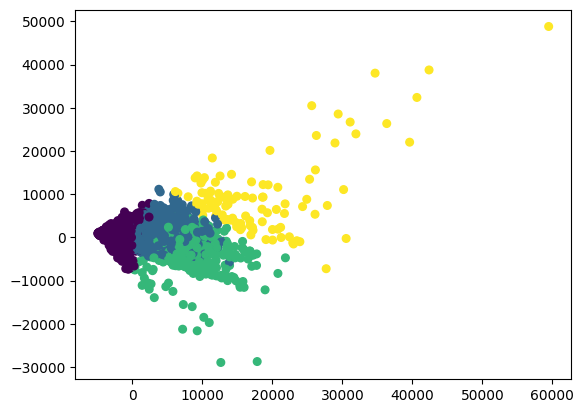

Plot for actual label training  


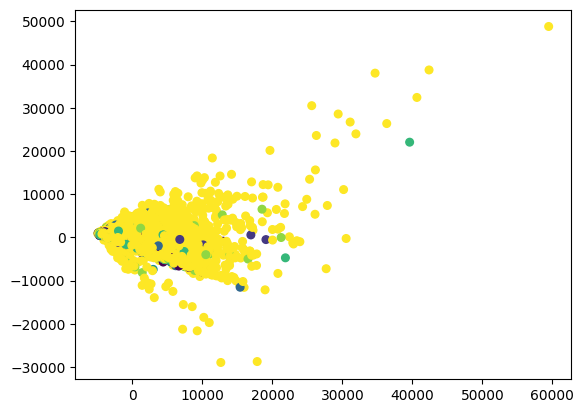

In [360]:
#Visualizing the kmeans with k=4
k4 = KMeans(n_clusters = 4, random_state = 2021)
y_prediction4 = k4.fit_predict(X_train)
centers4 = k4.cluster_centers_
pca =PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

print("Plot for predicted label training  ")
plt.scatter(x,y,c=y_prediction4,s=30,cmap='viridis')
plt.show()
print("Plot for actual label training  ")
plt.scatter(x,y,c=Y_train,s=30,cmap='viridis')
plt.show()


Plot for predicted label training  


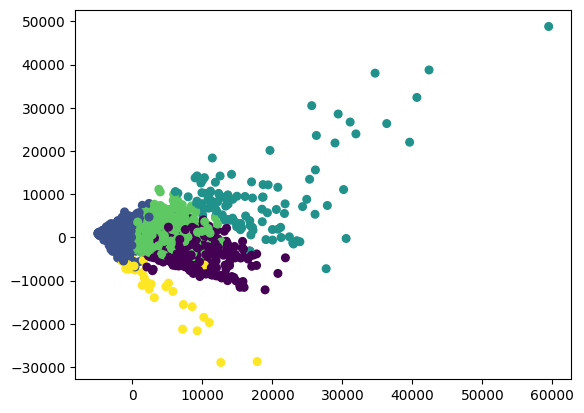

Plot for actual label training  


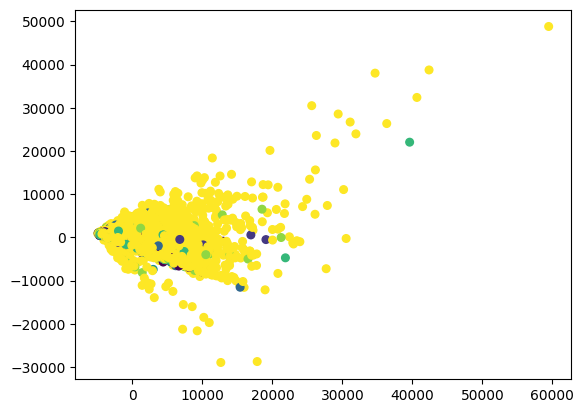

In [361]:
#Visualizing the kmeans with k=5
k5 = KMeans(n_clusters = 5, random_state = 2021)
y_prediction5 = k5.fit_predict(X_train)
centers5 = k5.cluster_centers_
pca=PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

print("Plot for predicted label training  ")
plt.scatter(x,y,c=y_prediction5,s=30,cmap='viridis')
plt.show()
print("Plot for actual label training  ")
plt.scatter(x,y,c=Y_train,s=30,cmap='viridis')
plt.show()




[[   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [  57    4    0    0    0    0    0    0    0]
 [  46    2    0    0    0    0    0    0    0]
 [  39    9    0    0    0    0    0    0    0]
 [  36    5    0    0    0    0    0    0    0]
 [  49    5    0    0    0    0    0    0    0]
 [  66   12    0    0    0    0    0    0    0]
 [1493  415    0    0    0    0    0    0    0]]


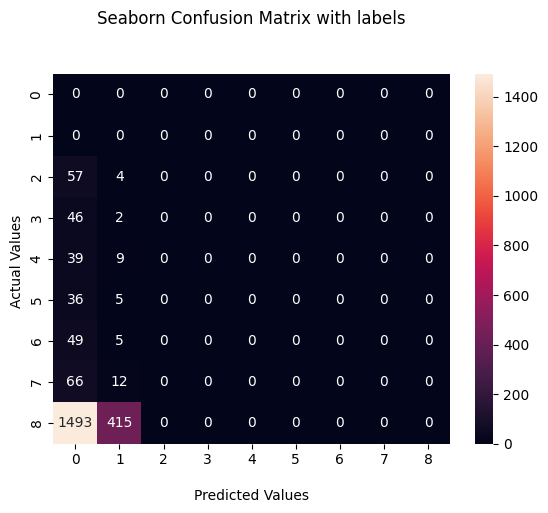

In [362]:
######Task 1-b-4: you need to provide the evaluation of your clustering model. 
#Print out a 2D confusion matrix and Print out a 2-D confusion matrix for all K values calculated above - 05 Points
from sklearn.metrics import confusion_matrix
import seaborn as sns 

prediction=k.fit_predict(X_test)
cf=confusion_matrix(Y_test,prediction)
print(cf)
ax=sns.heatmap(cf,annot=True,fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

######end Task 1-b-4

[[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   5   56    0    0    0    0    0    0    0    0]
 [   3   45    0    0    0    0    0    0    0    0]
 [  11   37    0    0    0    0    0    0    0    0]
 [   6   35    0    0    0    0    0    0    0    0]
 [   8   46    0    0    0    0    0    0    0    0]
 [  15   63    0    0    0    0    0    0    0    0]
 [ 496 1402   10    0    0    0    0    0    0    0]]


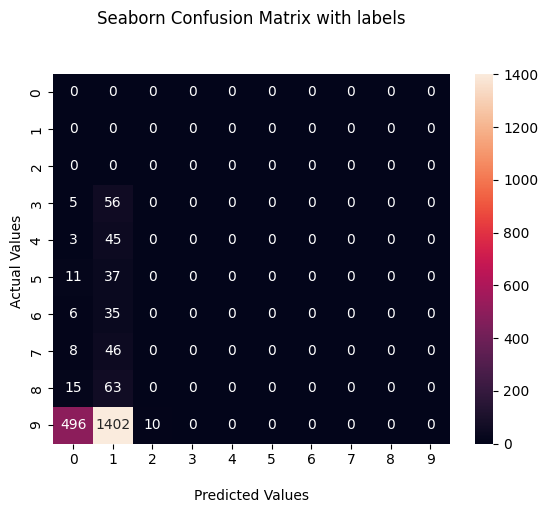

In [363]:
#Confusion matrix for k=3
from sklearn.metrics import confusion_matrix
import seaborn as sns 

y_prediction3=k3.fit_predict(X_test)
cf3=confusion_matrix(Y_test,y_prediction3)
print(cf3)
ax=sns.heatmap(cf3,annot=True,fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

[[   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [  56    0    1    4    0    0    0    0    0    0    0]
 [  45    0    0    3    0    0    0    0    0    0    0]
 [  35    0    1   12    0    0    0    0    0    0    0]
 [  34    0    0    7    0    0    0    0    0    0    0]
 [  45    0    0    9    0    0    0    0    0    0    0]
 [  61    0    3   14    0    0    0    0    0    0    0]
 [1335    8   35  530    0    0    0    0    0    0    0]]


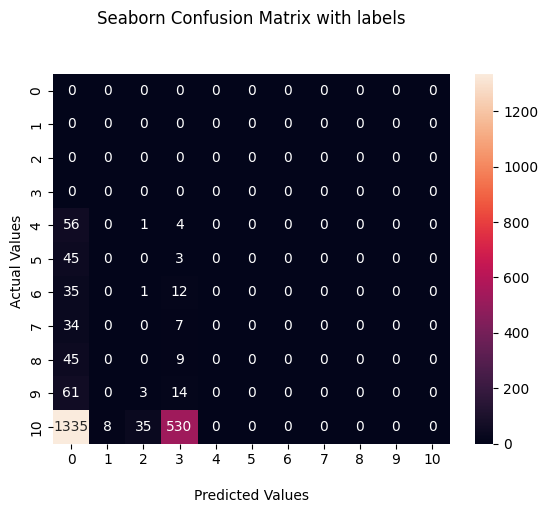

In [364]:
#Confusion matrix for k=4
from sklearn.metrics import confusion_matrix
import seaborn as sns 

y_prediction4=k4.fit_predict(X_test)
cf4=confusion_matrix(Y_test,y_prediction4)
print(cf4)
ax=sns.heatmap(cf4,annot=True,fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])
plt.show()

[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   4    0   55    1    1    0    0    0    0    0    0    0]
 [   5    0   42    1    0    0    0    0    0    0    0    0]
 [  10    0   32    6    0    0    0    0    0    0    0    0]
 [   5    0   33    3    0    0    0    0    0    0    0    0]
 [  11    0   42    1    0    0    0    0    0    0    0    0]
 [  21    0   49    7    1    0    0    0    0    0    0    0]
 [ 572    8 1093  213   22    0    0    0    0    0    0    0]]


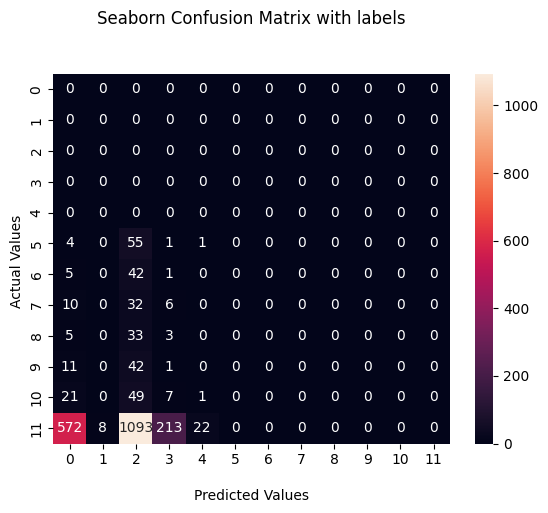

In [365]:
#Confusion matrix for k=5
from sklearn.metrics import confusion_matrix
import seaborn as sns 

y_prediction5=k5.fit_predict(X_test)
cf5=confusion_matrix(Y_test,y_prediction5)
print(cf5)
ax=sns.heatmap(cf5,annot=True,fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])
plt.show()

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

--> Perform Hierarchical Agglomerative clustering with different linkage methods for complete and average and different similarity measures for cosine, euclidean, and manhattan

--> Use F1 score for evaluation by taking number of clusters as 2.



In [366]:
###################begin code for Task 2-a: Print out a confusion matrix - 20 Points
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete for each linkage methods and for each similarity measures.
model1 = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete').fit_predict(X_train)

model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit_predict(X_train)

model3 = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete').fit_predict(X_train)

model4 = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average').fit_predict(X_train)

model5 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average').fit_predict(X_train)

model6 = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average', ).fit_predict(X_train)

## Print the 2-D confusion matrix with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) 
##To find the best pair of linkage method and similarity measure. 

print("F1-score for complete linkage + cosine", f1_score(Y_train, model1, average='macro'))
print("F1-score for complete linkage + euclidean", f1_score(Y_train, model2, average='macro'))
print("F1-score for complete linkage + manhattan", f1_score(Y_train, model3, average='macro'))
print("F1-score for average linkage + cosine", f1_score(Y_train, model4, average='macro'))
print("F1-score for average linkage + euclidean", f1_score(Y_train, model5, average='macro'))
print("F1-score for average linkage + manhattan", f1_score(Y_train, model6, average='macro'))


###################end code for Task 2-a


F1-score for complete linkage + cosine 0.0
F1-score for complete linkage + euclidean 0.0
F1-score for complete linkage + manhattan 0.0
F1-score for average linkage + cosine 0.0
F1-score for average linkage + euclidean 0.0
F1-score for average linkage + manhattan 0.0


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

--> Use the best model from above and use to visualize predicted and actual trianing samples on scatter plot. Use Pca model from X_train_pca from Task 1-b-2. 


Plot for predicted label training average linkage + manhattan: 


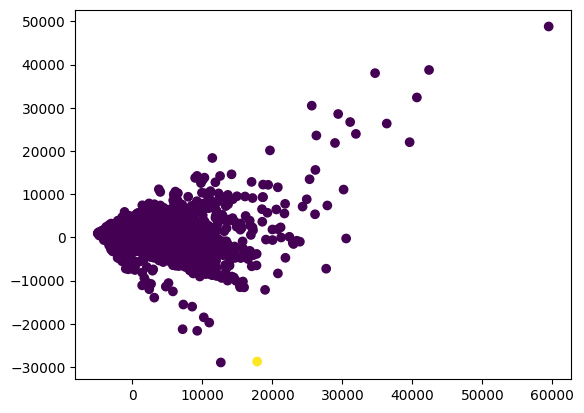

Plot for actual label training average linkage + manhattan: 


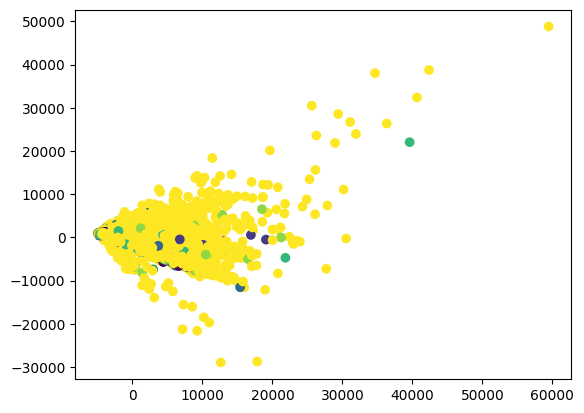

In [367]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels - 10 Points
print("Plot for predicted label training average linkage + manhattan: ")
plt.scatter(X_train_pca[:, 0],X_train_pca[:, 1],c=model6,cmap='viridis')
plt.show()
# Visualize the predicted training labels versus actual training labels. 
print("Plot for actual label training average linkage + manhattan: ")
plt.scatter(X_train_pca[:, 0],X_train_pca[:, 1],c=Y_train,cmap='viridis')
plt.show()
###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

--> Task 3-1 Visualize Clusters :- In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. 

--> Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. Use number cluster = 2 for below example


 Plot for K-means labels


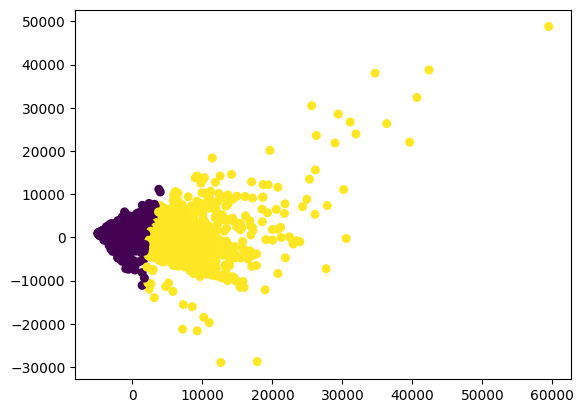

<Figure size 640x480 with 0 Axes>

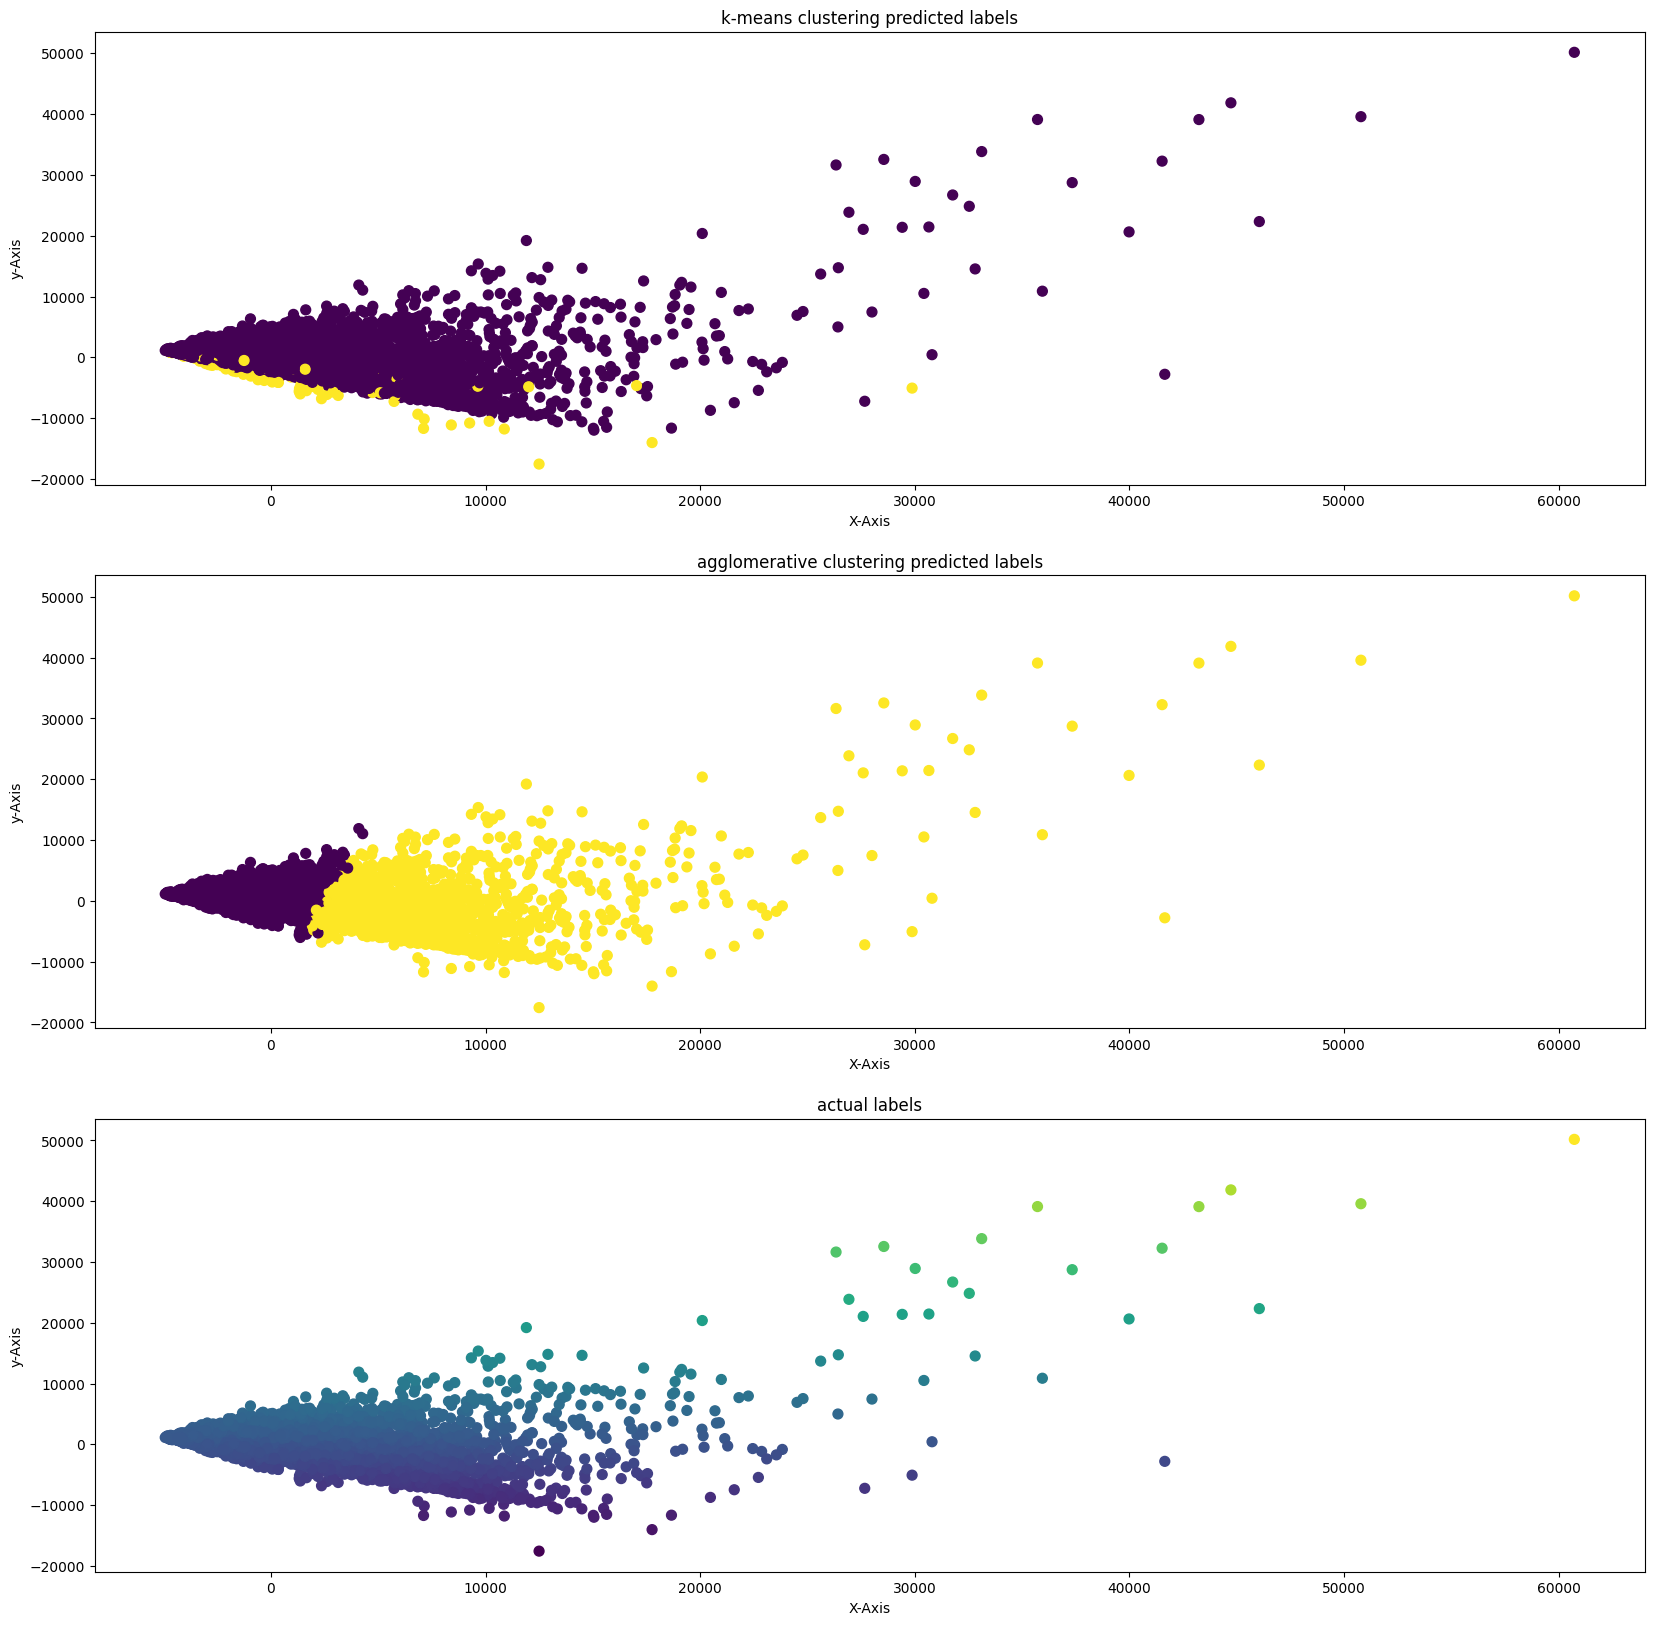

In [368]:
#####Task 3-1: Visualize the predicted training labels vs actual training labels - 10 Points

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
k = KMeans(n_clusters=2, random_state=0).fit_predict(X)

# k labels
print("\n Plot for K-means labels")
plt.scatter(x,y,c=y_prediction,s=30,cmap='viridis')
plt.show()


### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_fulldata = pairwise_distances(X)
# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
model = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average').fit_predict(X)


### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = None
X_pca = PCA(n_components = 2).fit_transform(X)
x = X_pca[:, 0]
y = X_pca[:, 1]

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
graph = plt.figure()
graph, base = plt.subplots(3, 1, figsize=(20,20))
base[0].set_title('k-means clustering predicted labels')
base[1].set_title('agglomerative clustering predicted labels')
base[2].set_title('actual labels')
base[0].set_xlabel('X-Axis')
base[0].set_ylabel('y-Axis')
base[1].set_xlabel('X-Axis')
base[1].set_ylabel('y-Axis')
base[2].set_xlabel('X-Axis')
base[2].set_ylabel('y-Axis')
base[0].scatter(x, y, c=model,s=50)
base[1].scatter(x, y, c=k, s=50)
base[2].scatter(x, y, c=y, s=50)



######end Task 3-1

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out 2D confusion matrices for k and agglomerative clustering. Also, compare precision, recall, and F1-score for both model in at least 3-4 lines. Type your reasoning.

In [369]:
######Task 3-b  - 10 Points

#Confusion matrix and classification report for K-means

print("Confusion Matrix :\n",confusion_matrix(k,model))
print("Classification report :",classification_report(k,model))





######end Task 3-b

Confusion Matrix :
 [[6858  169]
 [1890   33]]
Classification report :               precision    recall  f1-score   support

           0       0.78      0.98      0.87      7027
           1       0.16      0.02      0.03      1923

    accuracy                           0.77      8950
   macro avg       0.47      0.50      0.45      8950
weighted avg       0.65      0.77      0.69      8950



References :

1.https://medium.com/analytics-vidhya/k-means-clustering-43d0136bf005

2.https://stackoverflow.com/questions/18770348/hierarchical-clustering-from-confusion-matrix-with-python

3.https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019

4.https://scholar.google.com/scholar?q=hierarchical+agglomerative+clustering+visualisation+program&hl=en&as_sdt=0&as_vis=1&oi=scholart